## EDA:

__Hypothesis:__  More users may have used the app during 2020 (pandemic year) than the previous year. 
__Exploration:__  Since the data source only includes reviews and not download numbers, compare the total number of reviews submitted in 2019 (pre-pandemic) to total number of reviews submitted in 2020 (during pandemic)?


__Hypothesis:__  More users may have _enjoyed_ the app during 2020 (pandemic year) than the previous year. 
__Exploration:__ Was there a difference in review rating distributions for 2019 (pre-pandemic) and 2020 (during pandemic)?


__Hypothesis:__  The most frequent words used in high and low rated reviews might tell us what users liked and disliked about the app.
 __Exploration:__ What are the top 30 words used in 5 star ratings? What are the top 30 words used in 2 and 1 star ratings?



In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

In [2]:
# Functions
def show_bar_plot(my_data, 
                  my_figsize, 
                  my_color, 
                  my_titletext,
                  my_xlabeltext, 
                  my_ylabeltext,
                  my_titlefontsize=14,
                  my_lablefontsize=12,
                  display_percent=False):

    my_data.plot.bar(rot=90, alpha=0.80, figsize=my_figsize, color=my_color)
    plt.title(my_titletext, size=my_titlefontsize)
    plt.xlabel(my_xlabeltext, size=my_lablefontsize)
    plt.ylabel(my_ylabeltext, size=my_lablefontsize)
    bar_labels = my_data.values
  
    for i in range(len(my_data.values)):
        the_bar_label = bar_labels[i]
        if display_percent:
            the_bar_label = get_pretty_percent(bar_labels[i], reviews_df.shape[0])
        plt.text(x=i, y=bar_labels[i], s=the_bar_label, va='top', ha='left', size=my_lablefontsize, color='black')
    plt.show()


def show_unstackedbar_plot(my_data, my_figsize, my_colormap, my_titletext, my_xlabeltext, my_ylabeltext):
    my_data.unstack().plot.bar(fontsize=12, rot=30, alpha=0.80, figsize=my_figsize, colormap=my_colormap)
    plt.grid(color='black', alpha=0.1, linestyle ='-', linewidth=1)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.show()

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return "{:.1%}".format(percentage)


In [3]:
# Read in the collected and prepared data
cookpad_reviews_df = pd.read_csv('../data/cookpad_recent_reviews.csv')
cookpad_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              4276 non-null   object
 1   userName              4276 non-null   object
 2   content               4276 non-null   object
 3   score                 4276 non-null   int64 
 4   reviewCreatedVersion  4276 non-null   object
 5   reviewTimestamp       4276 non-null   object
 6   replyContent          20 non-null     object
 7   repliedAt             20 non-null     object
 8   reviewYear            4276 non-null   int64 
 9   reviewDateString      4276 non-null   object
dtypes: int64(2), object(8)
memory usage: 334.2+ KB


In [4]:
# min and max year for Review - Assuming time is in GMT. Verify this if possible.
print('min review time')
print(cookpad_reviews_df['reviewTimestamp'].min())

print('max review time')
print(cookpad_reviews_df['reviewTimestamp'].max())

min review time
2019-01-01 04:27:45
max review time
2021-04-02 09:25:12


In [5]:
# Select the reviews within our desired timeframe (2019 and 2020)
reviews_df = cookpad_reviews_df[(cookpad_reviews_df['reviewTimestamp'] >= '2019-01-01') & 
                                (cookpad_reviews_df['reviewTimestamp'] <=  '2020-12-31')]

In [6]:
print('min review time')
print(reviews_df['reviewTimestamp'].min())

print('max review time')
print(reviews_df['reviewTimestamp'].max())

min review time
2019-01-01 04:27:45
max review time
2020-12-30 23:31:13


In [7]:
reviews_df['reviewTimestamp'] = pd.to_datetime(reviews_df['reviewTimestamp'])
reviews_df['reviewMonth'] = reviews_df.apply(lambda row: row['reviewTimestamp'].month, axis=1)

#### Question:
 Was there a difference in number of reviews submitted in 2019 (pre-pandemic) and 2020 (during pandemic)?

#### Answer: 
There were more reviews submitted in 2019 than in 2020. The total nubmer of __reviews for 2020 dropped 12% from the previous year__. This disproved my hypothesis that the review count would be higher in 2020 (due to an increase in people staying at home due to the pandemic).

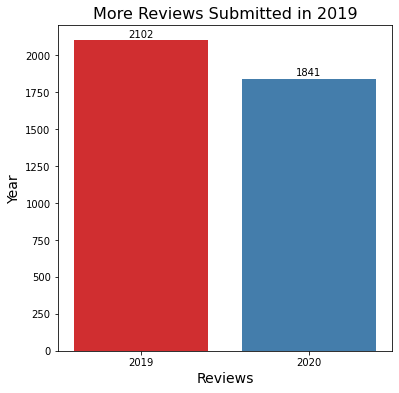

In [8]:
by_year = reviews_df.groupby(['reviewYear'])['reviewId'].count()
by_year.sort_index()

fig, bar = plt.subplots(figsize = (6,6))
bar = sns.barplot(x=by_year.index, y=by_year, saturation=0.80, palette="Set1")
bar.set_title('More Reviews Submitted in 2019', fontdict= { 'fontsize': 16})
bar.set_xlabel('Reviews', size=14)
bar.set_ylabel('Year', size=14)

#label each bar in barplot
for p in bar.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 bar.text(x = p.get_x()+(p.get_width()/2),      
         # x-coordinate position of data label, padded to be in the middle of the bar
         y = height+20,                        
          # y-coordinate position of data label, padded 100 above bar
         s = '{:.0f}'.format(height),           
         #data label, formatted to ignore decimals
         ha = 'center')                         
         # sets horizontal alignment (ha) to center
plt.show()  


In [9]:
lesser = by_year[2020]
greater = by_year[2019]
percentage = (lesser/ greater * 100).round()
drop = 100 - percentage
print(percentage, ' ', drop)

88.0   12.0


#### Question:
 Was there a difference in the distribution of ratings in 2019 and 2020? Were users happier with the app in 2020?

#### Answer: 
When comparing 2019 to 2020 star ratings, there is really no difference. While there is no increase in the percentage of 5 star (very happy users), we can take pride that 80% of user ratings were 5 star for both 2019 and 2020. 


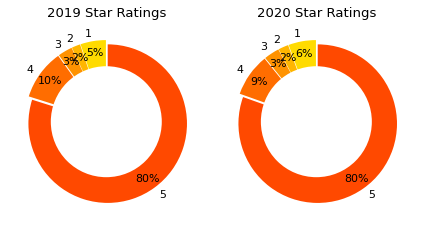

In [10]:
by_score_2019 = reviews_df[reviews_df['reviewYear'] == 2019].groupby(['score'])['reviewId'].count()
by_score_2020 = reviews_df[reviews_df['reviewYear'] == 2020].groupby(['score'])['reviewId'].count()

plt.rcParams['font.size'] = 11
colors = sns.color_palette('autumn_r')
explode = (0.03, 0.03, 0.03, 0.03, 0.03)


plt.subplot(1, 2, 1)
by_score_2019.plot.pie(colors = colors, autopct='%.0f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.ylabel('')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
# Adding Title of chart
plt.title('2019 Star Ratings')


plt.subplot(1, 2, 2)
by_score_2020.plot.pie(colors = colors, autopct='%.0f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.ylabel('')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
# Adding Title of chart
plt.title('2020 Star Ratings')

plt.tight_layout()
plt.show()


In [11]:
from myFunctions import process_text
from myFunctions import get_eng_stopwords_list
from myFunctions import plot_word_cloud
from myFunctions import process_texts

In [14]:
reviews_2019_df = reviews_df[reviews_df['reviewYear'] == 2019]
reviews_2020_df = reviews_df[reviews_df['reviewYear'] == 2020]

eng_stopwords = get_eng_stopwords_list()

# words in 2019 reviews
top_reviews_2019 = reviews_2019_df[reviews_2019_df['score'] == 5]['content'].to_list()
top_reviews_2019_words = process_texts(top_reviews_2019, eng_stopwords)
low_reviews_2019 = reviews_2019_df[reviews_2019_df['score'] < 3]['content'].to_list()
low_reviews_2019_words = process_texts(low_reviews_2019, eng_stopwords)

# words in 2020 reviews
top_reviews_2020 = reviews_2020_df[reviews_2020_df['score'] == 5]['content'].to_list()
top_reviews_2020_words = process_texts(top_reviews_2020, eng_stopwords)
low_reviews_2020 = reviews_2020_df[reviews_2020_df['score'] < 3]['content'].to_list()
low_reviews_2020_words = process_texts(low_reviews_2020, eng_stopwords)

### Simple Text Analysis

#### Question: What are the top 20 mentioned words in 5 star reviews? 

#### Answer: As expected, the terms "cookpad" and "app" show up often in the reviews. These terms, while used very often, are not very informative. More informative words/terms are:
(2019)
* good
* recipe
* love
* helpful
* useful
* great
* cook/cooking
* good app
(Indonesian*)
* sangat membantu = Very helpful 
* resep = recipe



(2020)
* good
* recipe
* cooking/cook
* great
* helpful
* really
* love
(Indonesian*)
* resep = recipe
* sangat membantu = Very helpful


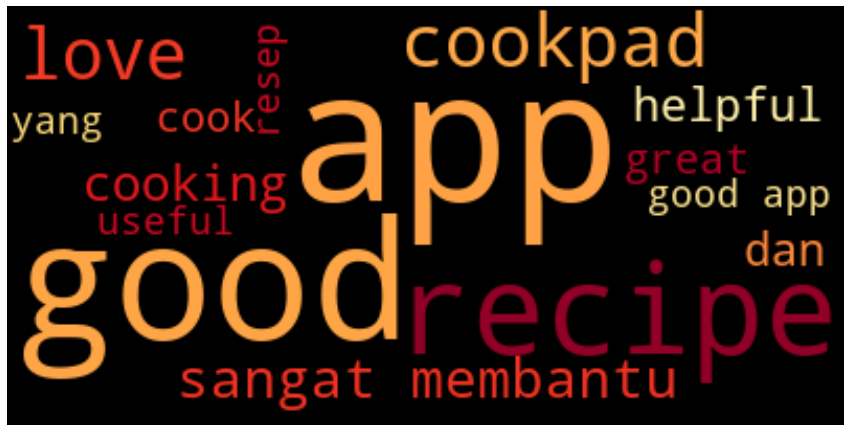

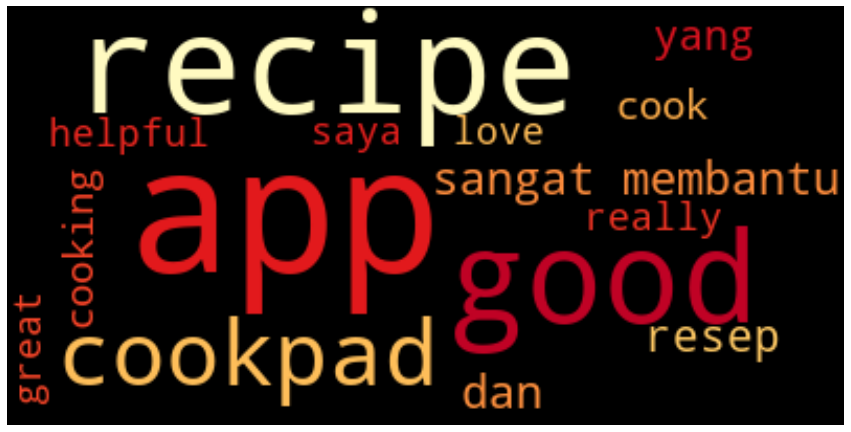

In [36]:
# Generate word clouds for 5 star reviews for 2019 (words and bi-grams)
top_reviews_2019_corpus = ' '.join(word for word in top_reviews_2019_words)
plot_word_cloud(text=top_reviews_2019_corpus, word_max=15, colors='YlOrRd')

# Generate word clouds for 5 star reviews for 2020 (words and bi grams )
top_reviews_2020_corpus = ' '.join(word for word in top_reviews_2020_words)
plot_word_cloud(text=top_reviews_2020_corpus, word_max=15, colors='YlOrRd')


#### Question: What are the top 30 mentioned words in 1 and 2 star reviews? 

#### Answer: As expected, the terms "cookpad" and "app" show up often in the reviews. These terms, while used very often, are not very informative. More informative words/terms are:

(2019)
* recipe
* update
* version
* please
* find
* use
* see
* one

(2020)
* recipe
* update
* premium
* bad
* want
* search
* log
* need


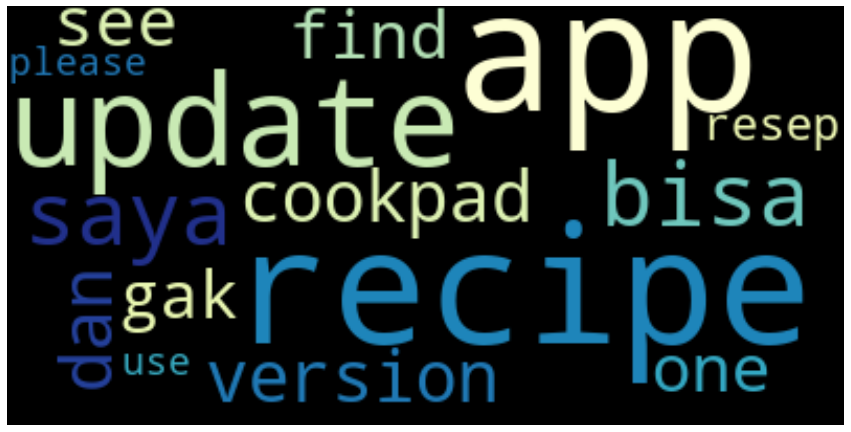

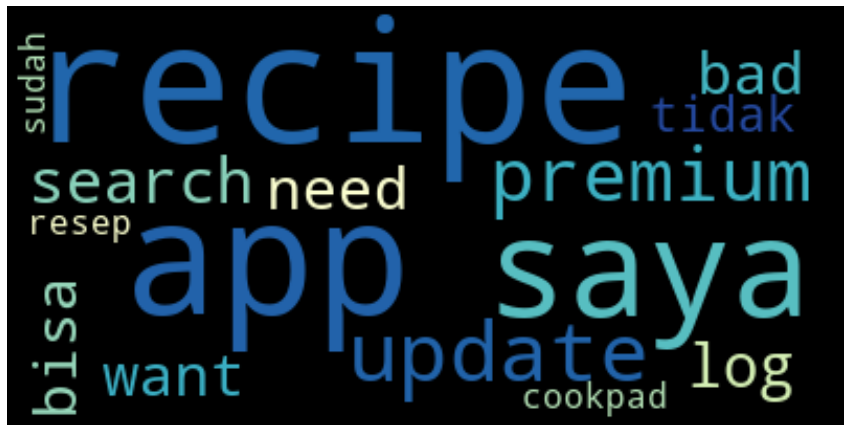

In [37]:
# Generate word clouds for 1 and 2 star reviews for 2019 
low_reviews_2019_corpus = ' '.join(word for word in low_reviews_2019_words)
plot_word_cloud(text=low_reviews_2019_corpus, word_max=15, colors='YlGnBu')

# Generate word clouds for 1 and 2 star reviews for 2020
low_reviews_2020_corpus = ' '.join(word for word in low_reviews_2020_words)
plot_word_cloud(text=low_reviews_2020_corpus, word_max=15, colors='YlGnBu')

__*__ Useing Google translate, I discovered that the most frequent non-English terms were detected to be Indonesian. 
Non-informative terms were:
* saya = I
* yang = that
* dan = and
* saya = I
* dan = and
* yang = that